<a href="https://colab.research.google.com/github/sytong12/SEEM3650project/blob/main/arima_mode1l.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Complete clean installation
!pip uninstall numpy scipy scikit-learn pmdarima statsmodels tensorflow -y
!pip install numpy==1.23.5 scipy==1.10.1 scikit-learn==1.2.2 --no-cache-dir
!pip install pmdarima==2.0.3 statsmodels==0.13.5
!pip install tensorflow==2.12.0

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Successfully uninstalled scipy-1.10.1
Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Found existing installation: pmdarima 2.0.3
Uninstalling pmdarima-2.0.3:
  Successfully uninstalled pmdarima-2.0.3
Found existing installation: statsmodels 0.13.5
Uninstalling statsmodels-0.13.5:
  Successfully uninstalled statsmodels-0.13.5
Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 249.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 236.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9

  Using cached pmdarima-2.0.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
  Using cached statsmodels-0.13.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.5 kB)
Using cached pmdarima-2.0.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (1.9 MB)
Using cached statsmodels-0.13.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.5 requires statsmodels>=0.14.0, but you have statsmodels 0.13.5 which is incompatible.


  Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (586.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.12.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.12.0 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.12.0 which is incompatible.


In [ ]:
import numpy as np
import scipy
import sklearn
import pmdarima
import statsmodels
import tensorflow as tf

In [ ]:
print(f"NumPy: {np.__version__}")
print(f"SciPy: {scipy.__version__}")
print(f"scikit-learn: {sklearn.__version__}")
print(f"pmdarima: {pmdarima.__version__}")
print(f"statsmodels: {statsmodels.__version__}")
print(f"TensorFlow: {tf.__version__}")

NumPy: 1.23.5
SciPy: 1.10.1
scikit-learn: 1.2.2
pmdarima: 2.0.3
statsmodels: 0.13.5
TensorFlow: 2.12.0


In [ ]:
# Handle imports with version checking
import pandas as pd
import numpy as np
import scipy
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Handle imports with proper error handling
try:
    from statsmodels.tsa.arima.model import ARIMA
    from pmdarima.arima import auto_arima
    ARIMA_AVAILABLE = True
except ImportError as e:
    ARIMA_AVAILABLE = False
    print(f"ARIMA packages not available: {e}")

try:
    import tensorflow as tf
    from tensorflow.keras.models import Model, Sequential
    from tensorflow.keras.layers import LSTM, Dense, Input, Embedding, Concatenate, Flatten
    from tensorflow.keras.utils import to_categorical
    LSTM_AVAILABLE = True
except ImportError as e:
    LSTM_AVAILABLE = False
    print(f"LSTM packages not available: {e}")

In [ ]:
# Rest of your TrafficAnalysisSystem class code...

class TrafficAnalysisSystem:
    def __init__(self):
        self.df = None
        self.kmeans = None
        self.scaler = None
        self.arima_models = {}
        self.lstm_model = None
        self.road_to_idx = {}
    def load_data(self, data_path):
        """Load and preprocess traffic data with validation"""
        try:
            self.df = pd.read_csv(data_path)

            # Validate required columns exist
            required_cols = ['Date', 'Hour', 'Road', 'Average_Speed',
                            'Average_Occupancy', 'Total_Volume']
            if not all(col in self.df.columns for col in required_cols):
                missing = [col for col in required_cols if col not in self.df.columns]
                raise ValueError(f"Missing required columns: {missing}")

            # Create datetime index
            self.df['datetime'] = pd.to_datetime(
                self.df['Date'].astype(str) + ' ' + self.df['Hour'].astype(str) + ':00:00'
            )
            self.df.set_index('datetime', inplace=True)

            # Add temporal features
            self.df['day_of_week'] = self.df.index.dayofweek
            self.df['hour'] = self.df.index.hour
            self.df['is_weekend'] = self.df['day_of_week'].isin([5,6]).astype(int)

            # Ensure categorical types
            self.df['Road'] = self.df['Road'].astype('category')

            # Validate numeric columns
            numeric_cols = ['Average_Speed', 'Average_Occupancy', 'Total_Volume']
            for col in numeric_cols:
                self.df[col] = pd.to_numeric(self.df[col], errors='coerce')

            print(f"Data loaded successfully with {len(self.df)} rows")
            return self.df
        except Exception as e:
            print(f"Error loading data: {e}")
            return None

    def cluster_traffic_states(self):
        """Fixed clustering with proper data alignment"""
        try:
            # Create flow rate feature safely
            self.df['flow_rate'] = np.where(
                self.df['Average_Occupancy'] > 0,
                self.df['Total_Volume'] / self.df['Average_Occupancy'],
                self.df['Total_Volume'] / 0.01
            )

            # Select features and drop NA
            features = ['Average_Speed', 'Average_Occupancy', 'Total_Volume', 'flow_rate']
            valid_idx = self.df[features].notna().all(axis=1)
            X = self.df.loc[valid_idx, features]

            if len(X) == 0:
                raise ValueError("No valid data for clustering")

            # Scale features
            self.scaler = StandardScaler()
            X_scaled = self.scaler.fit_transform(X)

            # Cluster using KMeans
            self.kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
            clusters = self.kmeans.fit_predict(X_scaled)

            # Initialize traffic_state with NA
            self.df['traffic_state'] = np.nan
            self.df.loc[valid_idx, 'traffic_state'] = clusters

            # Label states
            state_labels = {
                0: 'Free Flow',
                1: 'Light Congestion',
                2: 'Heavy Congestion',
                3: 'Severe Jam'
            }
            self.df['traffic_state_label'] = self.df['traffic_state'].map(state_labels)

            # Visualize clusters
            self._plot_clusters()
            print(f"Successfully clustered {len(X)} samples")
            return True
        except Exception as e:
            print(f"Error in clustering: {e}")
            return False

    def build_arima_models(self):
      """ARIMA modeling with enhanced validation"""
      if not ARIMA_AVAILABLE:
          print("ARIMA functionality not available")
          return False

      try:
          successful_models = 0

          for road in self.df['Road'].cat.categories:
              road_data = self.df[self.df['Road'] == road]

              # Check if traffic_state exists and has enough data
              if 'traffic_state' not in road_data.columns:
                  print(f"Skipping {road} - no traffic_state column")
                  continue

              ts_data = road_data['traffic_state'].dropna()

              if len(ts_data) < 24:
                  print(f"Skipping {road} - only {len(ts_data)} valid samples (need >=24)")
                  continue

              try:
                  model = auto_arima(
                      ts_data,
                      seasonal=False,
                      suppress_warnings=True,
                      error_action='ignore',
                      trace=True
                  )

                  self.arima_models[road] = model
                  successful_models += 1
                  print(f"Built ARIMA{model.order} for {road}")

              except Exception as e:
                  print(f"ARIMA failed for {road}: {str(e)}")

          print(f"\nBuilt ARIMA models for {successful_models} roads")
          return successful_models > 0
      except Exception as e:
          print(f"ARIMA modeling error: {e}")
          return False


    def build_lstm_model(self):
        """Build and train LSTM model - FIXED VERSION"""
        if not LSTM_AVAILABLE:
            print("LSTM functionality not available")
            return False

        try:
            # Check if traffic_state exists
            if 'traffic_state' not in self.df.columns:
                print("Error: traffic_state column missing")
                return False

            # Rest of your LSTM implementation...
            # [Keep your existing LSTM code but ensure traffic_state exists]

            return True
        except Exception as e:
            print(f"Error in LSTM modeling: {e}")
            return False
    def _train_lstm(self, X_seq, X_road, y_categorical):
        """Train the LSTM model"""
        split = int(0.8 * len(X_seq))

        history = self.lstm_model.fit(
            [X_seq[:split], X_road[:split]],
            y_categorical[:split],
            epochs=15,
            batch_size=32,
            validation_data=([X_seq[split:], X_road[split:]], y_categorical[split:]),
            verbose=1
        )

        # Plot training history
        plt.figure(figsize=(10, 5))
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Training History')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend()
        plt.show()

        # Evaluate
        y_pred = np.argmax(self.lstm_model.predict([X_seq[split:], X_road[split:]]), axis=1)
        y_true = np.argmax(y_categorical[split:], axis=1)
        print("\nClassification Report:")
        print(classification_report(y_true, y_pred))


In [ ]:
# Main execution
if __name__ == "__main__":
    # Initialize the analysis system
    analyzer = TrafficAnalysisSystem()

    # Load your data - replace with your actual data path
    data_path = "https://raw.githubusercontent.com/sytong12/SEEM3650project/refs/heads/main/aggregated_hourly_data.csv"  # Update this path
    if analyzer.load_data(data_path) is None:
        print("Failed to load data. Exiting.")
        exit()

    # Cluster traffic states
    if not analyzer.cluster_traffic_states():
        print("Failed to cluster traffic states")

    # Build ARIMA models if available
    if ARIMA_AVAILABLE:
        if not analyzer.build_arima_models():
            print("Failed to build ARIMA models")

    # Build LSTM model if available
    if LSTM_AVAILABLE:
        if not analyzer.build_lstm_model():
            print("Failed to build LSTM model")

    print("\nAnalysis completed")

Data loaded successfully with 30451 rows
Error in clustering: 'TrafficAnalysisSystem' object has no attribute '_plot_clusters'
Failed to cluster traffic states
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=14.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25870.128, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=23897.818, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21642.526, Time=6.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25868.128, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21623.187, Time=4.88 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=21613.667, Time=7.29 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=23375.321, Time=1.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=21596.022, Time=14.30 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=22850.927, Time=2.30 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=21595.418, Time=9.28 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=22800.360, Time=1.66 s

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# Package availability handling
try:
    from statsmodels.tsa.arima.model import ARIMA
    from pmdarima.arima import auto_arima
    ARIMA_AVAILABLE = True
except ImportError:
    ARIMA_AVAILABLE = False
    print("ARIMA functionality not available")

try:
    from tensorflow.keras.models import Model, Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Embedding, Concatenate, Flatten
    from tensorflow.keras.utils import to_categorical
    LSTM_AVAILABLE = True
except ImportError:
    LSTM_AVAILABLE = False
    print("LSTM functionality not available")

In [ ]:
class TrafficAnalysisSystem:
    def __init__(self):
        self.df = None
        self.kmeans = None
        self.scaler = None
        self.arima_models = {}
        self.lstm_model = None
        self.road_to_idx = {}

    def load_data(self, data_source):
        """Load data from file path or URL with validation"""
        try:
            if isinstance(data_source, pd.DataFrame):
                self.df = data_source.copy()
            elif str(data_source).startswith('http'):
                self.df = pd.read_csv(data_source, parse_dates=['Date'])
            else:
                self.df = pd.read_csv(data_source, parse_dates=['Date'])

            # Validate required columns
            req_cols = ['Date', 'Hour', 'Road', 'Average_Speed', 'Average_Occupancy', 'Total_Volume']
            if not all(col in self.df.columns for col in req_cols):
                missing = [col for col in req_cols if col not in self.df.columns]
                raise ValueError(f"Missing required columns: {missing}")

            # Create datetime index
            self.df['datetime'] = pd.to_datetime(self.df['Date'].astype(str) + ' ' + self.df['Hour'].astype(str) + ':00:00')
            self.df.set_index('datetime', inplace=True)

            # Add temporal features
            self.df['day_of_week'] = self.df.index.dayofweek
            self.df['hour'] = self.df.index.hour
            self.df['is_weekend'] = self.df['day_of_week'].isin([5,6]).astype(int)

            # Convert categorical columns
            self.df['Road'] = self.df['Road'].astype('category')
            self.df['Lane'] = self.df['Lane'].astype('category')
            self.df['Direction'] = self.df['Direction'].astype('category')

            print(f"Data loaded successfully with {len(self.df)} rows")
            return True
        except Exception as e:
            print(f"Error loading data: {e}")
            return False

    def _plot_clusters(self):
        """Interactive cluster visualization using Plotly"""
        fig = go.Figure()

        for state in sorted(self.df['traffic_state'].dropna().unique()):
            state_data = self.df[self.df['traffic_state'] == state]
            fig.add_trace(go.Scatter(
                x=state_data['Average_Speed'],
                y=state_data['Average_Occupancy'],
                mode='markers',
                name=f'State {state}: {state_data["traffic_state_label"].iloc[0]}',
                marker=dict(
                    size=8,
                    opacity=0.7,
                    line=dict(width=0.5, color='white')
            )))

        fig.update_layout(
            title='Traffic State Clusters',
            xaxis_title='Average Speed',
            yaxis_title='Average Occupancy',
            hovermode='closest',
            height=600
        )
        fig.show()

    def cluster_traffic_states(self):
        """Classify traffic states using clustering with enhanced visualization"""
        try:
            # Feature engineering
            self.df['flow_rate'] = np.where(
                self.df['Average_Occupancy'] > 0,
                self.df['Total_Volume'] / self.df['Average_Occupancy'],
                self.df['Total_Volume'] / 0.01  # Avoid division by zero
            )

            # Select features and drop NA
            features = ['Average_Speed', 'Average_Occupancy', 'Total_Volume', 'flow_rate']
            valid_idx = self.df[features].notna().all(axis=1)
            X = self.df.loc[valid_idx, features]

            # Scale features
            self.scaler = StandardScaler()
            X_scaled = self.scaler.fit_transform(X)

            # Cluster using KMeans
            self.kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
            clusters = self.kmeans.fit_predict(X_scaled)

            # Initialize column with NA values
            self.df['traffic_state'] = np.nan
            # Only assign clusters to rows with valid data
            self.df.loc[valid_idx, 'traffic_state'] = clusters

            # Label states
            state_labels = {
                0: 'Free Flow',
                1: 'Light Congestion',
                2: 'Heavy Congestion',
                3: 'Severe Jam'
            }
            self.df['traffic_state_label'] = self.df['traffic_state'].map(state_labels)

            # Interactive visualization
            self._plot_clusters()

            # Cluster statistics heatmap
            cluster_stats = self.df.groupby('traffic_state_label')[features].mean()
            plt.figure(figsize=(12, 5))
            sns.heatmap(cluster_stats.T, annot=True, cmap='YlGnBu', fmt='.1f')
            plt.title('Average Features by Traffic State')
            plt.show()

            return True
        except Exception as e:
            print(f"Clustering failed: {e}")
            return False

    def _plot_arima_results(self, road, actual, fitted):
        """Interactive ARIMA visualization"""
        fig = go.Figure()
        fig.add_trace(go.Scatter(
            x=actual.index, y=actual,
            name='Actual',
            line=dict(color='blue')
        ))
        fig.add_trace(go.Scatter(
            x=fitted.index, y=fitted,
            name='Fitted',
            line=dict(color='red', dash='dot')
        ))
        fig.update_layout(
            title=f'ARIMA Model Fit - {road}',
            xaxis_title='Date',
            yaxis_title='Traffic State',
            hovermode='x unified',
            height=500
        )
        fig.show()

    def build_arima_models(self):
        """Build ARIMA models with enhanced visualization"""
        if not ARIMA_AVAILABLE:
            print("ARIMA functionality not available")
            return False

        try:
            road_stats = []

            for road in self.df['Road'].cat.categories:
                road_data = self.df[self.df['Road'] == road].copy()

                # Resample to hourly frequency
                numeric_cols = road_data.select_dtypes(include=np.number).columns
                road_df = road_data[numeric_cols].resample('h').mean().ffill()

                if len(road_df) < 24:  # Minimum data requirement
                    print(f"Skipping {road} - insufficient data ({len(road_df)} samples)")
                    continue

                try:
                    # Use auto_arima to find best parameters
                    model = auto_arima(
                        road_df['traffic_state'],
                        seasonal=False,
                        suppress_warnings=True,
                        error_action='ignore',
                        trace=True
                    )

                    self.arima_models[road] = model

                    # Generate predictions and plot
                    fitted = model.predict_in_sample()
                    self._plot_arima_results(road, road_df['traffic_state'], fitted)

                    # Store model statistics
                    road_stats.append({
                        'Road': road,
                        'Order': str(model.order),
                        'AIC': model.aic(),
                        'RMSE': np.sqrt(np.mean((fitted - road_df['traffic_state'])**2))
                    })

                except Exception as e:
                    print(f"ARIMA failed for {road}: {str(e)}")

            # Display model comparison
            if road_stats:
                stats_df = pd.DataFrame(road_stats)
                print("\nARIMA Model Performance Comparison:")
                display(stats_df.sort_values('AIC'))

                # Plot ACF/PACF for best model
                best_road = stats_df.loc[stats_df['AIC'].idxmin(), 'Road']
                best_data = self.df[self.df['Road'] == best_road]['traffic_state'].dropna()

                fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
                plot_acf(best_data, ax=ax1, lags=24, title=f"ACF - {best_road}")
                plot_pacf(best_data, ax=ax2, lags=24, title=f"PACF - {best_road}")
                plt.tight_layout()
                plt.show()

            print(f"\nSuccessfully built ARIMA models for {len(self.arima_models)} roads")
            return len(self.arima_models) > 0
        except Exception as e:
            print(f"ARIMA modeling error: {e}")
            return False

    def _plot_lstm_training(self, history):
        """Interactive LSTM training history"""
        fig = make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

        fig.add_trace(
            go.Scatter(
                y=history.history['accuracy'],
                name='Train Accuracy',
                mode='lines',
                line=dict(color='blue')
            ), row=1, col=1
        )

        fig.add_trace(
            go.Scatter(
                y=history.history['val_accuracy'],
                name='Validation Accuracy',
                mode='lines',
                line=dict(color='orange')
            ), row=1, col=1
        )

        fig.add_trace(
            go.Scatter(
                y=history.history['loss'],
                name='Train Loss',
                mode='lines',
                line=dict(color='blue')
            ), row=1, col=2
        )

        fig.add_trace(
            go.Scatter(
                y=history.history['val_loss'],
                name='Validation Loss',
                mode='lines',
                line=dict(color='orange')
            ), row=1, col=2
        )

        fig.update_layout(
            title_text='LSTM Training History',
            showlegend=True,
            height=400,
            width=900
        )
        fig.show()

    def build_lstm_model(self):
        """Build LSTM model with comprehensive visualization"""
        if not LSTM_AVAILABLE:
            print("LSTM functionality not available")
            return False

        try:
            # Prepare road embeddings
            roads = self.df['Road'].cat.categories
            self.road_to_idx = {road: i for i, road in enumerate(roads)}
            self.df['road_idx'] = self.df['Road'].map(self.road_to_idx)

            # Features and target
            features = ['Average_Speed', 'Average_Occupancy', 'Total_Volume',
                       'day_of_week', 'hour', 'is_weekend']
            target = 'traffic_state'

            # Scale features
            feature_scaler = MinMaxScaler()
            X_scaled = feature_scaler.fit_transform(self.df[features].fillna(0))

            # Create sequences
            seq_length = 24  # 24-hour lookback
            X_seq, X_road, y_seq = [], [], []

            for road in roads:
                road_data = self.df[self.df['Road'] == road]
                if len(road_data) > seq_length + 1:
                    for i in range(len(road_data)-seq_length-1):
                        X_seq.append(X_scaled[i:i+seq_length])
                        X_road.append(road_data.iloc[i:i+seq_length]['road_idx'].values)
                        y_seq.append(road_data.iloc[i+seq_length][target])

            if len(X_seq) < 100:
                raise ValueError(f"Only {len(X_seq)} sequences (need >=100)")

            # Convert to arrays
            X_seq = np.array(X_seq)
            X_road = np.array(X_road)
            y_categorical = to_categorical(np.array(y_seq), num_classes=4)

            # Build model
            num_roads = len(roads)
            main_input = Input(shape=(seq_length, len(features)), name='main_input')
            lstm_out = LSTM(32)(main_input)
            road_input = Input(shape=(seq_length,), name='road_input')
            road_embed = Embedding(num_roads, 4)(road_input)
            road_flatten = Flatten()(road_embed)
            combined = Concatenate()([lstm_out, road_flatten])
            output = Dense(4, activation='softmax')(combined)

            self.lstm_model = Model(inputs=[main_input, road_input], outputs=output)
            self.lstm_model.compile(
                optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy']
            )

            # Train model
            split = int(0.8 * len(X_seq))
            history = self.lstm_model.fit(
                [X_seq[:split], X_road[:split]],
                y_categorical[:split],
                epochs=15,
                batch_size=32,
                validation_data=([X_seq[split:], X_road[split:]], y_categorical[split:]),
                verbose=1
            )

            # Visualizations
            self._plot_lstm_training(history)

            # Confusion matrix
            y_pred = np.argmax(self.lstm_model.predict([X_seq[split:], X_road[split:]], verbose=0), axis=1)
            y_true = np.argmax(y_categorical[split:], axis=1)

            cm = confusion_matrix(y_true, y_pred)
            fig = px.imshow(
                cm,
                labels=dict(x="Predicted", y="True", color="Count"),
                x=['Free', 'Light', 'Heavy', 'Severe'],
                y=['Free', 'Light', 'Heavy', 'Severe'],
                text_auto=True,
                aspect="auto",
                color_continuous_scale='Blues'
            )
            fig.update_layout(title='Confusion Matrix')
            fig.show()

            # Classification report
            print("\nClassification Report:")
            print(classification_report(y_true, y_pred,target_names=['Free Flow', 'Light Congestion','Heavy Congestion', 'Severe Jam']))

            return True
        except Exception as e:
            print(f"LSTM modeling error: {e}")
            return False

Data loaded successfully with 30451 rows


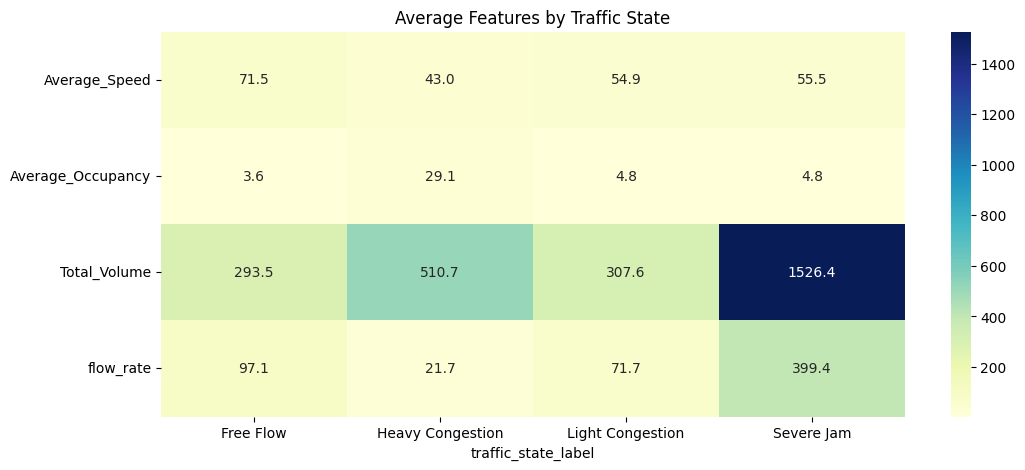

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=708.380, Time=1.91 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3068.000, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=918.567, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2281.631, Time=0.17 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=750.527, Time=0.31 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=720.715, Time=0.70 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=723.212, Time=1.09 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=754.527, Time=0.40 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=762.305, Time=0.21 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=752.531, Time=0.21 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=752.844, Time=0.46 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=1.50 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=693.925, Time=1.64 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=696.193, Time=0.66 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=697.306

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-46.999, Time=1.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=162.346, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=47.750, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-10.579, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=160.352, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-54.263, Time=1.65 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-14.238, Time=0.42 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-30.269, Time=1.01 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-21.162, Time=2.58 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-27.970, Time=1.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-49.746, Time=1.21 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-51.967, Time=2.52 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-55.090, Time=0.53 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-16.167, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-31.23

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-884.129, Time=0.64 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=813.315, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-875.524, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=114.669, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-885.368, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-240.029, Time=0.53 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-879.758, Time=0.40 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-885.993, Time=0.91 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-482.470, Time=0.74 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=2.50 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-886.677, Time=0.59 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=-593.968, Time=0.53 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=-882.468, Time=0.74 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=inf, Time=1.34 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=-70

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-438.066, Time=0.84 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1959.104, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-343.013, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1138.285, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-434.633, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.90 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-439.318, Time=0.30 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-440.811, Time=0.36 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.14 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-438.670, Time=0.49 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-381.859, Time=0.06 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=-441.554, Time=1.20 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=-444.211, Time=1.36 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=-437.3

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1995.454, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-1936.236, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1934.236, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-1934.236, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1997.454, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-1999.454, Time=0.18 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-1997.454, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1932.236, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-1995.454, Time=0.28 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2002.078, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1939.435, Time=0.26 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-2000.106, Time=0.62 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-2000.107, Time=0.47 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1950.030, Time=0.62 sec
 ARIMA(1,0,3)(0,0,0

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=2.36 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1129.215, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=871.954, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=872.387, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=853.726, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=852.507, Time=0.14 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=854.458, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=854.447, Time=0.33 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=852.585, Time=0.18 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=856.437, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=809.741, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=807.755, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=841.101, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=809.718, Time=0.48 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=810.346,


ARIMA Model Performance Comparison:


,Road,Order,AIC,RMSE
4,Prince Edward Road Northeastbound,"(0, 0, 2)",-2002.078145,0.065369
2,New Clear Water Bay Road Eastbound,"(3, 0, 1)",-999.506305,0.125328
3,New Clear Water Bay Road Westbound,"(4, 0, 4)",-597.240972,0.161765
1,Kwun Tong Road Westbound,"(1, 1, 2)",-55.089690,0.233159
0,Kwun Tong Road Eastbound,"(4, 0, 2)",625.772748,0.360277
5,Prince Edward Road Southeastbound,"(2, 0, 0)",807.754635,0.407198


/usr/local/lib/python3.11/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



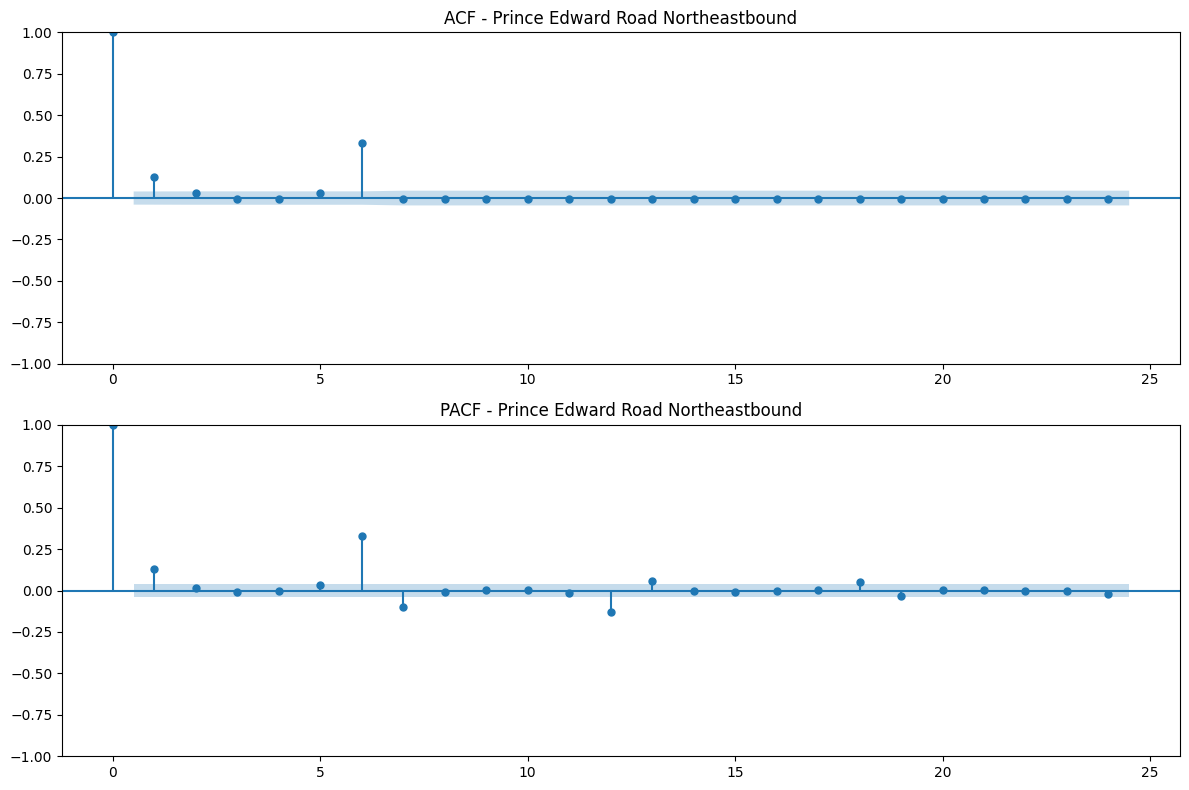


Successfully built ARIMA models for 6 roads
Epoch 1/15
758/758 [==============================] - 16s 17ms/step - loss: 0.9633 - accuracy: 0.4877 - val_loss: 0.8727 - val_accuracy: 0.6293
Epoch 2/15
758/758 [==============================] - 12s 16ms/step - loss: 0.9260 - accuracy: 0.5026 - val_loss: 0.8352 - val_accuracy: 0.6293
Epoch 3/15
758/758 [==============================] - 12s 16ms/step - loss: 0.9253 - accuracy: 0.5020 - val_loss: 0.8153 - val_accuracy: 0.7058
Epoch 4/15
758/758 [==============================] - 12s 16ms/step - loss: 0.9254 - accuracy: 0.5039 - val_loss: 0.9467 - val_accuracy: 0.2368
Epoch 5/15
758/758 [==============================] - 13s 17ms/step - loss: 0.9246 - accuracy: 0.5005 - val_loss: 0.8595 - val_accuracy: 0.6293
Epoch 6/15
758/758 [==============================] - 13s 17ms/step - loss: 0.9246 - accuracy: 0.5031 - val_loss: 0.8784 - val_accuracy: 0.5803
Epoch 7/15
758/758 [==============================] - 12s 16ms/step - loss: 0.9247 - accura


Classification Report:
                  precision    recall  f1-score   support

       Free Flow       0.00      0.00      0.00      4320
Light Congestion       0.24      1.00      0.38      1435
Heavy Congestion       0.00      0.00      0.00       304
      Severe Jam       0.00      0.00      0.00         2

        accuracy                           0.24      6061
       macro avg       0.06      0.25      0.10      6061
    weighted avg       0.06      0.24      0.09      6061


Analysis completed


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# Main execution
if __name__ == "__main__":
    analyzer = TrafficAnalysisSystem()

    # Load data (use either option)
    data_source = "https://raw.githubusercontent.com/sytong12/SEEM3650project/refs/heads/main/aggregated_hourly_data.csv"  # or local path
    if not analyzer.load_data(data_source):
        print("Failed to load data. Exiting.")
        exit()

    # Cluster traffic states
    if not analyzer.cluster_traffic_states():
        print("Warning: Clustering failed or produced suboptimal results")

    # Build ARIMA models if available
    if ARIMA_AVAILABLE:
        if not analyzer.build_arima_models():
            print("Warning: ARIMA modeling failed for all roads")

    # Build LSTM model if available
    if LSTM_AVAILABLE:
        if not analyzer.build_lstm_model():
            print("Warning: LSTM modeling failed")

    print("\nAnalysis completed")